In [1]:
import numpy as np
from scipy.stats import trim_mean, iqr, median_abs_deviation, shapiro, kstest, normaltest, probplot, norm

import seaborn as sns
import matplotlib.pyplot as plt

from prettytable import PrettyTable

from fractions import Fraction as F

<AxesSubplot:ylabel='Count'>

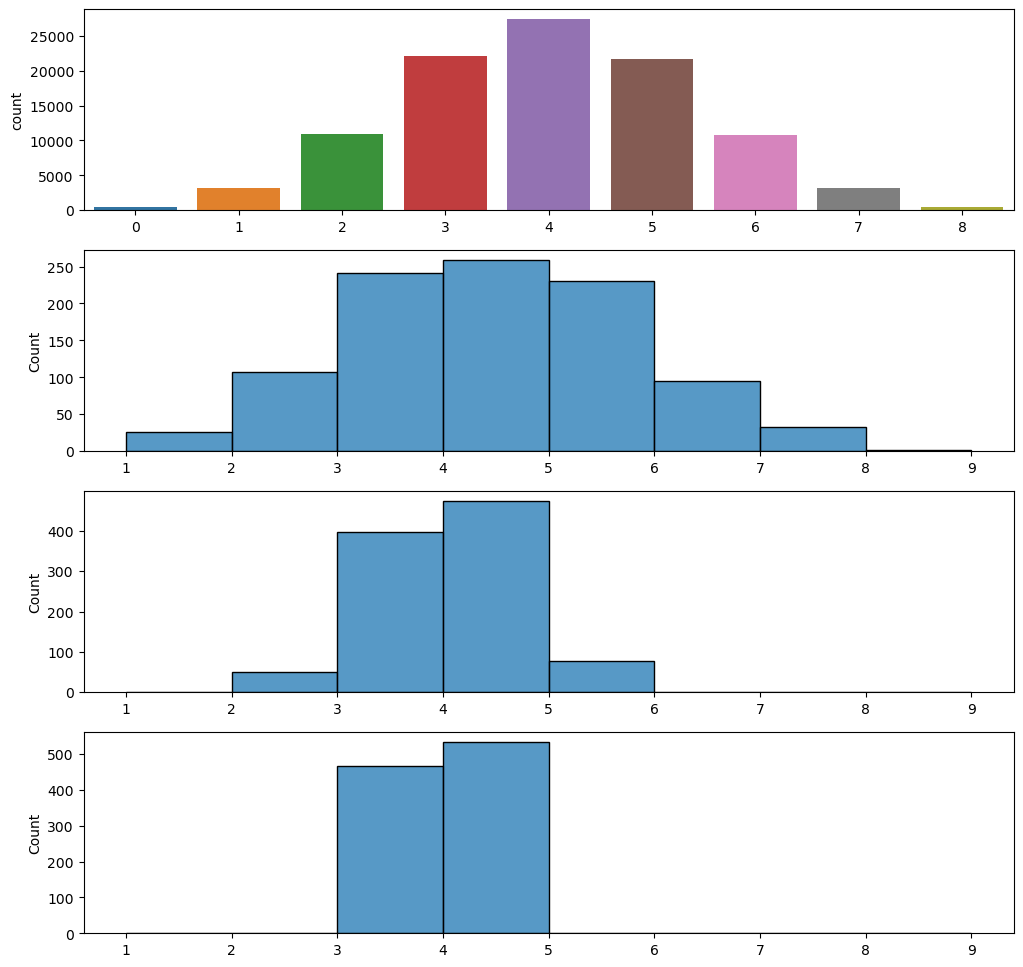

In [2]:
qtd = 100000

n=8; p = F(1,2)

binomial = np.random.binomial(n,p,qtd)

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))

sns.countplot(x=binomial, ax = axes[0])

bin1000 = np.random.choice(binomial,size=1000)

sns.histplot(bin1000, ax= axes[1], bins=n,binrange=(1,n+1))

mean5 = [np.mean(lista) for lista in [ np.random.choice(binomial,size=5) for i in range(1000)]]

sns.histplot(mean5, ax= axes[2], bins=n, binwidth=1,binrange=(1,n+1))

mean20 = [np.mean(lista) for lista in [ np.random.choice(binomial,size=20) for i in range(1000)]]

sns.histplot(mean20, ax= axes[3], bins=n, binwidth=1,binrange=(1,n+1))

<AxesSubplot:ylabel='Count'>

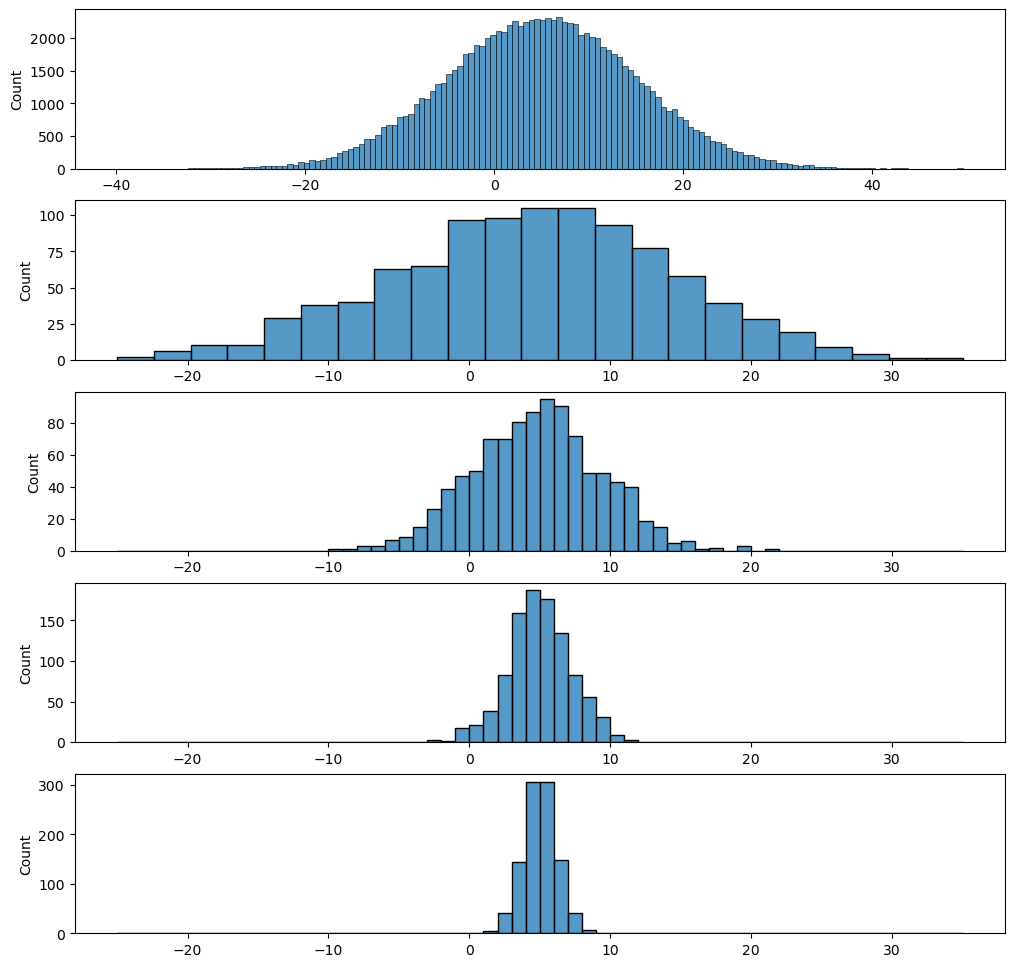

In [3]:
qtd = 100000

mi=5; sig = 10

normal = np.random.normal(loc=mi,scale=sig,size=qtd)

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 12))

sns.histplot(x=normal, ax = axes[0])

normal1000 = np.random.choice(normal,size=1000)

sns.histplot(normal1000, ax= axes[1], binrange=(mi-3*sig,mi+3*sig))

mean5 = [np.mean(lista) for lista in [ np.random.choice(normal,size=5) for i in range(1000)]]

sns.histplot(mean5, ax= axes[2], binwidth=1,binrange=(mi-3*sig,mi+3*sig))

mean20 = [np.mean(lista) for lista in [ np.random.choice(normal,size=20) for i in range(1000)]]

sns.histplot(mean20, ax= axes[3], binwidth=1,binrange=(mi-3*sig,mi+3*sig))

mean75 = [np.mean(lista) for lista in [ np.random.choice(normal,size=75) for i in range(1000)]]

sns.histplot(mean75, ax= axes[4], binwidth=1,binrange=(mi-3*sig,mi+3*sig))

+-------------------------------+---------------------------+
|     Média da Distribuição     |      Média da Amostra     |
+-------------------------------+---------------------------+
|              25.0             |          25.00455         |
+-------------------------------+---------------------------+
|   Variância da Distribuição   |   Variância da Amostral   |
+-------------------------------+---------------------------+
|              12.5             |     12.464109297499999    |
+-------------------------------+---------------------------+
| Desvio Padrão da Distribuição | Desvio Padrão da Amostral |
+-------------------------------+---------------------------+
|       3.5355339059327378      |     3.530454545451619     |
+-------------------------------+---------------------------+


C:\Users\ander\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Count'>

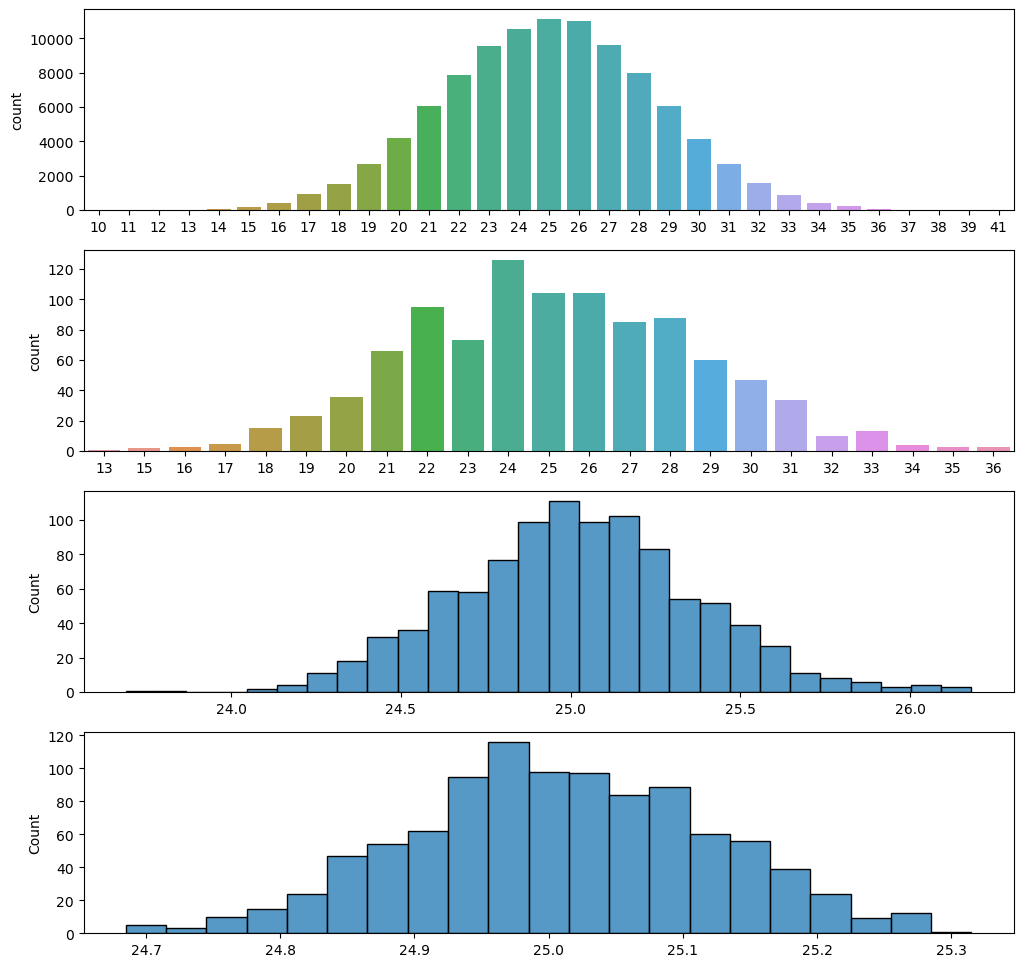

In [141]:
qtd = 100000

n=50; p = F(1,2)

binomial = np.random.binomial(n,p,qtd)

#Probabilidade da Binomial
( (binomial <= 7).sum() - (binomial < 4).sum() )/binomial.size

table = PrettyTable(hrules=True)

table.float_format = ".2f"

table.field_names = ["Média da Distribuição", "Média da Amostra"]

table.add_row([float(n*p),binomial.mean()])

table.add_row(["Variância da Distribuição","Variância da Amostral"])

table.add_row([float(n*p*(1-p)), np.var(binomial)])

table.add_row(["Desvio Padrão da Distribuição","Desvio Padrão da Amostral"])

table.add_row([ np.sqrt(float(n*p*(1-p))),np.std(binomial)])

print(table)

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))

sns.countplot(x=binomial, ax = axes[0])

bin1000 = np.random.choice(binomial,size=1000)

sns.countplot(bin1000,ax= axes[1])

mean100 = [np.mean(lista) for lista in [ np.random.choice(binomial,size=100) for i in range(1000)]]

sns.histplot(mean100, ax=axes[2])

mean1000 = [np.mean(lista) for lista in [ np.random.choice(binomial,size=1000) for i in range(1000)]]

sns.histplot(mean1000, ax= axes[3])

In [143]:
float(n*p), np.mean(mean100)

#float(n*p), np.mean(mean1000)


(25.0, 25.02045)

In [131]:
tabela = PrettyTable()

amostraQtd = 10

meanDistr = [np.mean(lista) for lista in [ np.random.choice(binomial,size=amostraQtd) for i in range(1000)]]

# Adicionando a primeira coluna
tabela.add_column("Parâmetro", ["Estatística", "p-valor"])

stat, p = shapiro(meanDistr)
tabela.add_column("Shapiro-Wilk Test", [f"{stat:.4f}", f"{p:.4f}"])


stat, p = normaltest(meanDistr)
tabela.add_column("D’Agostino’s K-squared Test", [f"{stat:.4f}", f"{p:.4f}"])

tabela

# Test interpretation
# if the p-value is greater then 0.05, we do not reject H0, indicating 
# that the data can be considered normal.

Parâmetro,Shapiro-Wilk Test,D’Agostino’s K-squared Test
Estatística,0.9969,1.4557
p-valor,0.0471,0.4829


In [6]:
binimialAraay=[]
for i in range (100):
    binomial = np.random.binomial(n,p,100)
    binimialAraay.append(binomial)
    
binimialAraay = np.array(binimialAraay)

In [7]:
np.std(np.std(binimialAraay,axes=0))

TypeError: _std_dispatcher() got an unexpected keyword argument 'axes'

In [ ]:
np.std(binimialAraay,axes=0)

sns.histplot(x=np.std(binimialAraay,axes=0))

In [ ]:
np.mean(np.std(binimialAraay,axes=0))